In [36]:
# Setup
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import sympy as sym
import scipy.stats as stats
from scipy import optimize
# Display Images and HTML
from IPython.display import Image
from IPython.core.display import HTML
# Comment the lines below if you don't use Jupyter Themes 
# (or edit if you prefer another appearance)
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [17]:
PATH = os.getcwd()

<h1>
    <div align="center"> 
        <b>AMS 511 Notebook Project: Mathematica to Python</b>
    </div>
</h1>
    
<h2>
    <div align="center"> 
        <b>Portfolio Optimization</b>
    </div>
</h2>

<h3>
    <div align = "center"> 
        <b>Author: Gomes, Marlon</b>
    </div>
</h3>

<h2>
    <b>Disclaimer</b>
</h2>

<p>The present notebook contains mainly excerpts from the original (Mathematica) notebook by Prof. Robert J. Frey for a course taught in the Fall of 2020. In particular, most textual content is directly quoted and/or copy-pasted while the coding components have been adapted from Mathematica to Python. The author took the liberty to reorganize some of the content to clarify the exposition. In the same interest, additional author's comments and new examples were included. The authors' viewpoints are tagged to distinguish them from Professor Frey's.</p>

<h2>Asset Return</h2>

<p>Asset return, the relative increase in wealth over a specified time interval from owning an asset, is a fundamental measure of investment performance (see: <a href="http://en.wikipedia.org/wiki/Rate_of_return" target ="_blank">Rate of return</a>). <br>
    In addition to owning an asset, holding a long position, it is also possible to create what is known as a short position, where the change in wealth from holding a short is the negative of the corresponding long position</p>

<h3>Rate of return</h3>

<p> A rate of return is much like an interest rate. Assuming that ther are no other cash flows involved, the rate of return $r_{t-\Delta, t}$ over a period of time from $t-\Delta$ to $t$, given starting and end prices $S_t-\Delta$ and $S_t$, respectively, is</p>
$$S_t = S_{t-\Delta}(1+r_{t-\Delta,t}) \Longrightarrow r_{t-\Delta,t} = \frac{S_t - S_{t-\Delta}}{S_{t-\Delta}}$$

<p> More generally, a rate of return from an activity can be thought of as a change in wealth $w$ from one point in time $t-\Delta$ to $t$,</p>
$$w_t = w_{t-\Delta}(1+r_{t-\Delta,t}) \Longrightarrow r_{t-\Delta, t} = \frac{w_t-w_{t-\Delta}}{w_{t-\Delta}}$$

<p> Normally, when speaking of the single period of return we simplify the notation such that $r_{t} = r_{r-1,t}$.</p>

<h4> Example: dividend payment</h4>

<p> A stock with a price of $S_t$ trades ex-dividend on $t$. The divident payment is $D_t$. The rate of return on the stock is </p>
$$r_t = \frac{w_{t}-w_{t-1}}{w_{t-1}} = \frac{S_t + D_t - S_{t-1}}{S_{t-1}}$$

<h4> Example: stock split</h4>

<p> At time $t$ a stock with a price $S_t$ experiences an $s:1$ stock split. The rate of return on the stock is</p>
$$r_t = \frac{w_{t}-w_{t-1}}{w_{t-1}} = \frac{sS_t - S_{t-1}}{S_{t-1}}$$

<h3> Log returns</h3>

<p> 
    Sometimes we speak of log return, $R_t$, which is not the logarithm of the return $r_t$, but rather the logarithm of the wealth ratio:
$$ R_t = \log \left( \frac{w_t}{w_{t-1}}\right) = \log(1+r_t)$$
</p>
<h3> 
    Short sales 
</h3>
<p>
    <a href="https://en.wikipedia.org/wiki/Short_(finance)" target="_blank">Short-selling</a> is the act of selling an asset that one does not own. This is done by borrowing the asset from someone who owns it, then selling it in the market. At some future point, the asset must be bought back in the open market and returned to the owner. Any cash-flows experienced by the asset (e.g. dividend payments) that occur during the period of the loan must be replaced by the short seller. If the price of the asset has dropped, then buying it back costs less than the original proceeds from selling it. Thus, the short-seller makes a prodit if the proce has declined and experiences a loss if the price has risen.
</p>
<div>
    <img src='Images/img1.png' width =600 height = 400>
</div>
<p>
    Shorting can be dangerous. If you buy an asset, then typically the most one can lose is the value of the asset. If one shorts an asset, there is no upper bound to the amount that can be lost. Here is an example of the profit and loss function for a non-dividend paying stock, purchased or shorted at $\$100$:
</p>

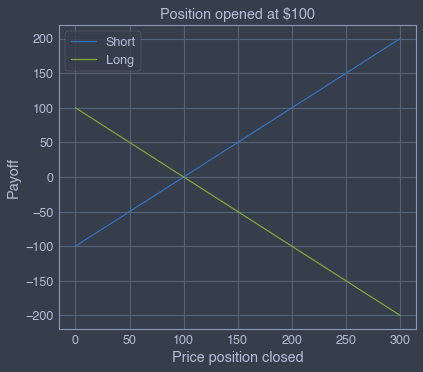

In [18]:
t = np.arange(0,300,0.1)
x = t-100
y = 100 - t

fig, ax = plt.subplots()
ax.plot(t,x, label = "Short")
ax.plot(t,y, label = "Long")

plt.xlabel("Price position closed")
plt.ylabel("Payoff")
plt.title("Position opened at $100")
plt.legend()
plt.show()

<p> Note that the maximum loss of a long positiono is limited to the original value of the asset, but the maximum gain is unbounded. The maximum loss for a short position is unbounded, but the maximum gain is limited to the value of the original position.</p>

<p> Also, closing out a short position requires that shares be purchased in the market in order to return them to the original holder from whem the stock was borrowed. A <i>short-squeeze</i> results when there are insufficient shares available in the market to acomplish this. Thus, it is sometimes extremely difficult and costly, even impossible, to close out a short, and this tends to occur precisely when you are most desperate to do so!
</p>

<p> In summary:
    <ul>
        <li>Long: unbounded gain, bounded loss. Subject to normal market liquidity.</li>
        <li>Short: bounded gain, unbounded loss. Subject to short-squeeze.</li>
    </ul>
</p>

<h2> Distribution of portfolio returns</h2>

<p> A common working assumption is that the distribution of asset returns follows a <a href="https://en.wikipedia.org/wiki/Multivariate_normal_distribution" target="_blank">Multivariate Normal Distribution</a>. This provides a framework in which the reward and risk of individual assets and of portfolios of those assets can be modeled. </p>

<h3> Multivariate Normal Distribution</h3>

<p> Let the $n$-dimensional random variable $X = (X_1, \cdots, X_n)^T$ follows a <i>Multivariate Normal Distribution</i>. This distribution is determined by two parameters:
    <ul>
        <li> The <i>mean vector</i> $\mu$, an n-vector
            $$\mu = 
            \begin{pmatrix}
                \mu_1 \\
                \mu_2 \\
                \vdots \\
                \mu_n
            \end{pmatrix},
            $$
            where $\mu_i = \mathrm{E}[X_i]$.
        </li>
        <li> The <i>covariance matrix</i> $\Sigma$, an $n \times n$ matrix
            $$ \Sigma = 
                \begin{pmatrix}
                    \sigma_{1,1} & \cdots & \sigma_{1,n}\\
                    \vdots & \ddots & \vdots\\
                    \sigma_{n,1} & \cdots & \sigma_{n,n}
                \end{pmatrix},
            $$
            where $\sigma_{i,j} = \mathrm{Cov}[X_i,X_j]=\mathrm{E}[(X_i - \mu_i)(X_j-\mu_j)]$. Note from the definition of covariance that the covariance matrix $\Sigma$ is symmetric and positive-semidefinite.</li>
    </ul>
</p>

<p> The <i>correlation matrix</i> is formed by dividing each covariance term by the prodec of the associated standard deviations, and is a measure of the relative strengh of the relationship between the components of $X$, 
     $$ C = 
                \begin{pmatrix}
                    \rho_{1,1} & \cdots & \rho_{1,n}\\
                    \vdots & \ddots & \vdots\\
                    \rho_{n,1} & \cdots & \rho_{n,n}
                \end{pmatrix},
    $$
where $\rho_{i.j} = \frac{\sigma_{i,j}}{\sigma_i \sigma_j}$.</p>

<p> <b>Authors' note</b>: in Finance, the covariance matrix represents <i>risk</i>, so it is reasonable to assume that it is indeed <i>positive-definite</i>, as a null-direction would correspond to a possibility of arbitrage.</p>

<p> In our work here we will assume that the covariance matrix is of full rank and, thus, the PDF of a Multivariate Normal Distribution can be expressed as 
    $$ \phi(x) = \frac{1}{\sqrt{(2\pi)^{n}\det(\Sigma)}} \exp\left(-\frac{1}{2}(x-\mu)^t\Sigma^{-1}(x-\mu)\right)$$
</p>

<h4> Example: bivariate normal distribution</h4>

<p> Consider the following mean and covariance parameters for a bivariate normal distribution, 
    $$ \mu =
            \begin{pmatrix}
                1 \\
                2
            \end{pmatrix}, \
        \Sigma = 
            \begin{pmatrix}
                1 & -\frac{1}{3} \\
                -\frac{1}{3} & 1
            \end{pmatrix}.
    $$
</p>
            
        

In [19]:
vnMu = np.array([1,2])
mnSigma = np.array([[1,-1/3], [-1/3,1]])

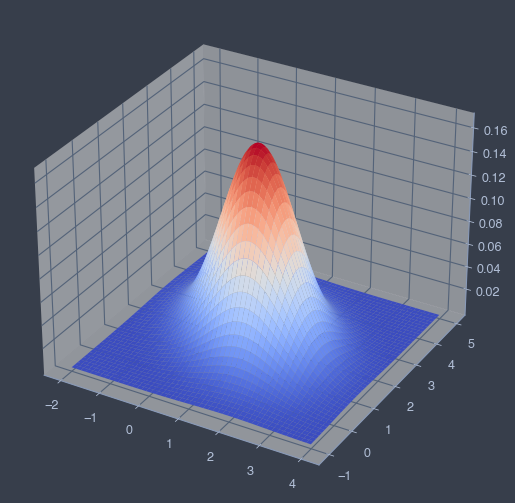

In [55]:
# A 3D plot of a bivariate normal
x,y = np.mgrid[-2:4:.01, -1:5:.01]
pos = np.dstack((x,y))
z = stats.multivariate_normal.pdf(pos,vnMu, mnSigma)

fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap = cm.coolwarm)

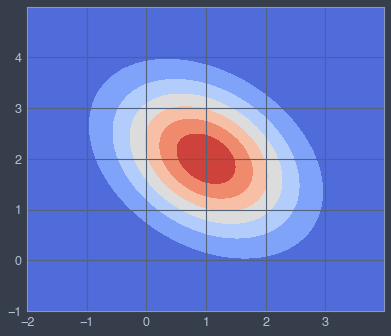

In [54]:
fig2,ax2 = plt.subplots()
ax2.contourf(x, y, z, cmap = cm.coolwarm)